In [83]:
import pandas as pd
train_data=pd.read_csv("train.csv")
train_data.head()


,Id,Sequence
0,3,"1,3,13,87,1053,28576,2141733,508147108,4021352..."
1,7,"1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,..."
2,8,"1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320..."
3,11,"1,8,25,83,274,2275,132224,1060067,3312425,1099..."
4,13,"1,111,12211,1343211,147753211,16252853211,1787..."


In [84]:
train_data.shape

(113845, 2)

In [85]:
train_data.iloc[[113818]]

,Id,Sequence
113818,227638,"0,8,26,57,104,170,258,371,512,684,890,1133,141..."


In [86]:
x= train_data[train_data['Id']==51]['Sequence'].size
x

1

In [87]:
9.87-10

-0.13000000000000078

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113845 entries, 0 to 113844
Data columns (total 2 columns):
Id          113845 non-null int64
Sequence    113845 non-null object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [89]:
train_data['Sequence']

0         1,3,13,87,1053,28576,2141733,508147108,4021352...
1         1,2,1,5,5,1,11,16,7,1,23,44,30,9,1,47,112,104,...
2         1,2,4,5,8,10,16,20,32,40,64,80,128,160,256,320...
3         1,8,25,83,274,2275,132224,1060067,3312425,1099...
4         1,111,12211,1343211,147753211,16252853211,1787...
5         1,1,1,1,1,1,1,1,1,5,1,1,1,1,5,5,1,1,1,1,11,5,5...
6         840,1320,1680,2520,3192,3432,4920,5208,5280,57...
7         1,2,7,27,113,483,2138,9681,44374,205500,961614...
8                                           4,6,8,9,26,1752
9         1,2,1,3,4,2,4,8,8,3,5,13,19,15,5,6,19,36,42,28...
10        1,176,570496,9223556096,460993706622976,552660...
11        18,24,30,36,42,54,60,66,84,108,126,138,174,186...
12        0,0,4,7,8,4,6,8,8,9,9,5,2,1,5,3,1,1,0,0,4,7,8,...
13        648391,718064159,7069067389,22742734291,362942...
14        1,1,3,1,3,7,1,3,11,19,1,3,15,35,47,1,3,19,51,1...
15        0,1,4,7,15,18,31,40,50,61,88,87,119,136,151,17...
16        1,2,3,4,5,7,9,12,21,114,200,35

In [90]:
def get_number_of_elements(row):
    row['count']=len(row['Sequence'].split(','))
    return row

In [91]:
train_data=train_data.apply(get_number_of_elements,axis=1)

In [92]:
train_data.columns.tolist()

['Id', 'Sequence', 'count']

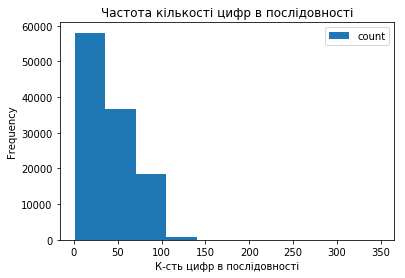

In [93]:
import matplotlib.pyplot as plt
train_data[['count']].plot(kind='hist')
plt.title('Частота кількості цифр в послідовності')
plt.xlabel('К-сть цифр в послідовності')
plt.show()


In [94]:
# зростаючі,спадаючі, монотонні послідовності
def get_up_down_monot(row):
    x=list(row['Sequence'].split(','))
    x=[int(el) for el in x]
    up=True
    down=True
    mon=False
    for i in range(1,len(x)):
        if x[i-1]>x[i]:
            up=False
        else:
            down=False
        if up==False and down==False:
            mon=True
            break
    if up:
        row['way']='increase'
    elif down:
        row['way']='decrease'
    else:
        row['way']='monotonic'
    return row

In [95]:
train_data=train_data.apply(get_up_down_monot,axis=1)
print(train_data.columns.tolist())

['Id', 'Sequence', 'count', 'way']


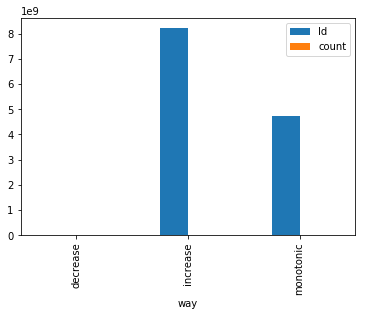

In [96]:
train_data.groupby(['way']).sum().plot(kind='bar')
plt.show()
# набагато більше визначених(зростаючих+спад)ніж монотонних

In [97]:
def get_max_order(row):
    x=row['Sequence'].split(',')
    max_order=max([len(el) for el in x])
    row['max_order']=max_order
    return row


In [98]:
train_data=train_data.apply(get_max_order,axis=1)
train_data.columns.tolist()

['Id', 'Sequence', 'count', 'way', 'max_order']

In [99]:
# train_data.groupby(['max_order']).sum().plot(kind='bar')
# plt.show()
train_data[['max_order']].describe()

,max_order
count,113845.000000
mean,10.229180
std,12.014789
min,1.000000
25%,3.000000
50%,6.000000
75%,14.000000
max,285.000000


In [100]:
train_data[train_data['max_order']==1].shape

(8610, 5)

In [101]:
train_data[train_data['way']=='monotonic'].shape

(41417, 5)

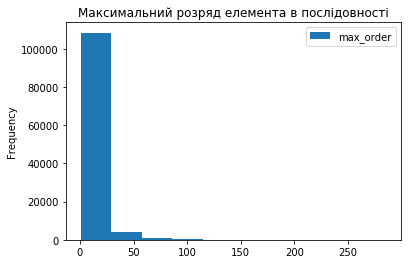

In [102]:
train_data[['max_order']].plot(kind='hist')
plt.title('Максимальний розряд елемента в послідовності')
plt.show()


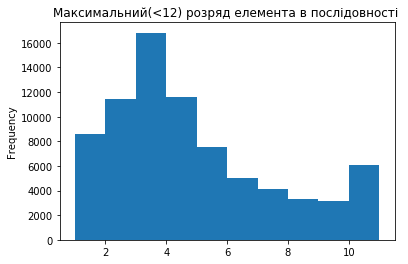

In [103]:
train_data[train_data['max_order']<12]['max_order'].plot(kind='hist')
plt.title('Максимальний(<12) розряд елемента в послідовності ')
plt.show()

In [104]:
train_data[train_data['max_order']==2].shape

(11448, 5)

In [105]:
def amount_of_diff_elem(row):
    x=row['Sequence']
    unique_elem=list()
    for item in x:
        if item not in unique_elem:
            unique_elem.append(item)
    row['unique_elem']=len(unique_elem)
    return row

train_data=train_data.apply(amount_of_diff_elem,axis=1)
print(train_data.columns.tolist())

['Id', 'Sequence', 'count', 'way', 'max_order', 'unique_elem']


In [106]:
def is_last_digit_repeat(row):
    x=row['Sequence']
    last_digit=x[-1]
    if last_digit in x[:-1]:
        row['last_digit_repeat']=1
    else:
        row['last_digit_repeat']=0
    return row
train_data=train_data.apply(is_last_digit_repeat,axis=1)
print(train_data.columns.tolist())

['Id', 'Sequence', 'count', 'way', 'max_order', 'unique_elem', 'last_digit_repeat']


In [107]:
train_data[train_data['last_digit_repeat']==1].shape

(112456, 7)

In [108]:
train_data[train_data['unique_elem']>11].shape

(5008, 7)

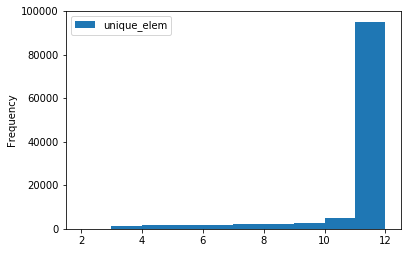

In [109]:
train_data[['unique_elem']].plot(kind='hist')
plt.show()

# Треба виправити, ідея: найчастіше зустірчаєме число в послідовності

In [111]:
def most_frequency_value(row):
    x=row['Sequence'].split(',')
    x=[int(item) for item in x]
    frequency_value=dict()
    for item in x:
        if item in frequency_value.keys():
            frequency_value[item]+=1
        else:
            frequency_value[item]=0
    often=max(frequency_value.values())
    for key in frequency_value.keys():
        if frequency_value[key]==often:
            row['most_freq_value']=key
    return row

train_data=train_data.apply(most_frequency_value,axis=1)

In [113]:
def t(row):
    row['most_freq_value']=row['most_freq_value']
    return row

train_data=train_data.apply(t,axis=1)
print(train_data.columns.tolist())


KeyboardInterrupt: 

In [ ]:
train_data.groupby(['most_freq_value']).sum().plot(kind='bar')
plt.show()



In [ ]:
int('1000')

In [ ]:
def is_all_different(row):
    x=row['Sequence'].split(',')
    x=[int(item) for item in x]
    print(x)
    diff=list()
    for item in x:
        
        if item in x:
            row['all_different']=0
            return row
        else:
            diff.append(item)
    row['all_different']=1
    return row


train_data=train_data.apply(is_all_different,axis=1)


In [ ]:
train_data[train_data['all_different']==1]

In [112]:
max_length = list([6, 10, 12, 14, 15, 20, 25])
slices = list([10, 12, 15, 17, 20, 22, 25])
min_lenght=list([8,10,12,14,16,18,20])
for i in zip(max_length,slices,min_lenght):
    print(i)

(6, 10, 8)
(10, 12, 10)
(12, 15, 12)
(14, 17, 14)
(15, 20, 16)
(20, 22, 18)
(25, 25, 20)


In [115]:
a=[10,11,12,13,14,15,16,17,18,19,20]
import itertools
combos=itertools.combinations(a, 3)
print(combos)

In [123]:
import itertools
max_length = list()
slices = list()
min_lenght = list()
stuff = [10,11,12,13,14,15,16,17,18,19]
for subset in itertools.combinations(stuff, 3):
    max_length.append(subset[0])
    slices.append(subset[1])
    min_lenght.append(subset[2])
print(len(slices))

120
